# Analyzing Spells Bound to D or F

First we have to import some modules and define some functions

In [4]:
from __future__ import division
import csv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import seaborn as sns
% matplotlib inline

In [5]:
spells = {1: 'SummonerBoost',
     2: 'SummonerClairvoyance',
     3: 'SummonerExhaust',
     4: 'SummonerFlash',
     6: 'SummonerHaste',
     7: 'SummonerHeal',
     11: 'SummonerSmite',
     12: 'SummonerTeleport',
     13: 'SummonerMana',
     14: 'SummonerDot',
     17: 'SummonerOdinGarrison',
     21: 'SummonerBarrier',
     30: 'SummonerPoroRecall',
     31: 'SummonerPoroThrow',
     32: 'SummonerSnowball'}

In [6]:
def getData(filename):
    features = []
    x = []
    y = []
    with open(filename, "r") as f:
        reader = csv.reader(f)
        for row in reader:
            x.append(row[:-2])
            y.append(row[-2:])
        features = x[0]
        x = x[1:]
        y = y[1:]
    return np.array(features), np.array(x), np.array(y)

In [7]:
def countSpells(features, x, y, spells):
    """
    """
    dkey = {}
    fkey = {}
    if int(y[0]) == 1:
        win = {"t100": True, "t200": False}
    else:
        win = {"t100": False, "t200": True}
    for i, feature in enumerate(features):
        if "spell1" in feature and x[i] == "1":
            f = feature.split(":spell1")
            team = f[0].split(":")[0]
            spell = spells[int(f[1])]
            if spell in dkey:
                dkey[spell][0] += 1
                if win[team]:
                    dkey[spell][1] += 1
            else:
                if win[team]:
                    dkey[spell] = [1, 1]
                else:
                    dkey[spell] = [1, 0]
        elif "spell2" in feature and x[i] == "1":
            f = feature.split(":spell2")
            team = f[0].split(":")[0]
            spell = spells[int(f[1])]
            if spell in fkey:
                fkey[spell][0] += 1
                if win[team]:
                    fkey[spell][1] += 1
            else:
                if win[team]:
                    fkey[spell] = [1, 1]
                else:
                    fkey[spell] = [1, 0]
    return dkey, fkey

In [8]:
def getSpellCount(features, x, y, spells):
    dkey = {}
    fkey = {}
    for i, row in enumerate(x):
        dup, fup = countSpells(features, row, y[i], spells)
        for key in dup:
            if key not in dkey:
                dkey[key] = dup[key]
            else:
                dkey[key][0] += dup[key][0]
                dkey[key][1] += dup[key][1]
        for key in fup:
            if key not in fkey:
                fkey[key] = fup[key]
            else:
                fkey[key][0] += fup[key][0]
                fkey[key][1] += fup[key][1]
    return dkey, fkey

In [9]:
def getTotals(dkey, fkey):
    dtotals = []
    dwins = []
    for key in dkey.keys():
        dtotals.append(dkey[key][0])
        dwins.append(dkey[key][1])
    ftotals = []
    fwins = []
    for key in fkey.keys():
        ftotals.append(fkey[key][0])
        fwins.append(fkey[key][1])
    return dtotals, dwins, ftotals, fwins

In [10]:
def plotData(dtotals, dwins, ftotals, fwins):
    numspells = np.arange(len(dkey))
    width = .4

    fig, ax = plt.subplots(figsize=(11, 7))
    rects1 = ax.bar(numspells, dtotals, width, color="#1a1aff")

    rects2 = ax.bar(numspells, dwins, width, color="#0066ff")

    rects3 = ax.bar(numspells + width, ftotals, width, color="#9966ff")

    rects4 = ax.bar(numspells + width, fwins, width, color="#9999ff")

    ax.set_ylabel("Games")
    ax.set_title("Spells on D vs F")
    ax.set_xticks(numspells + width)
    ax.set_xticklabels([x.split("Summoner")[1] for x in dkey.keys()])

    a = ax.legend((rects1[0], rects2[0], rects3[0], rects4[0]), ("Spell on D", "Wins on D", "Spell on F", "Win on F"))

# Bronze

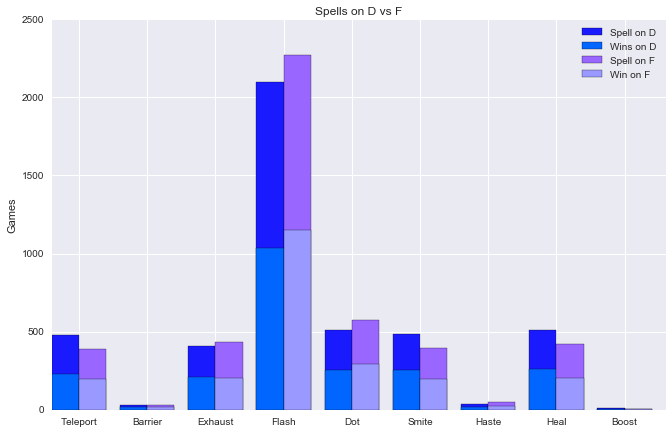

In [11]:
bfeatures, bx, by = getData("bronze.csv")
dkey, fkey = getSpellCount(bfeatures, bx, by, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Silver

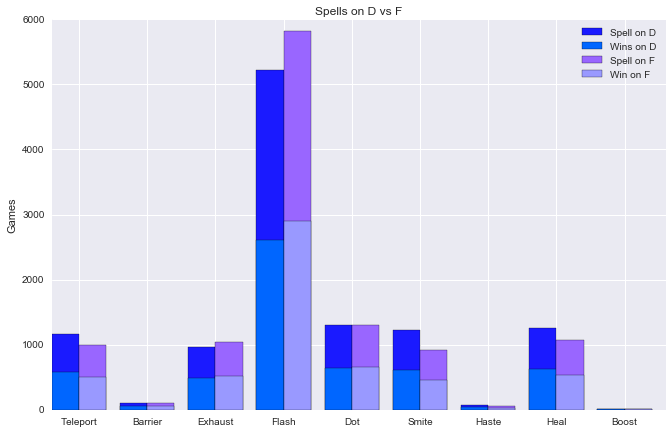

In [12]:
sfeatures, sx, sy = getData("silver.csv")
dkey, fkey = getSpellCount(sfeatures, sx, sy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Gold

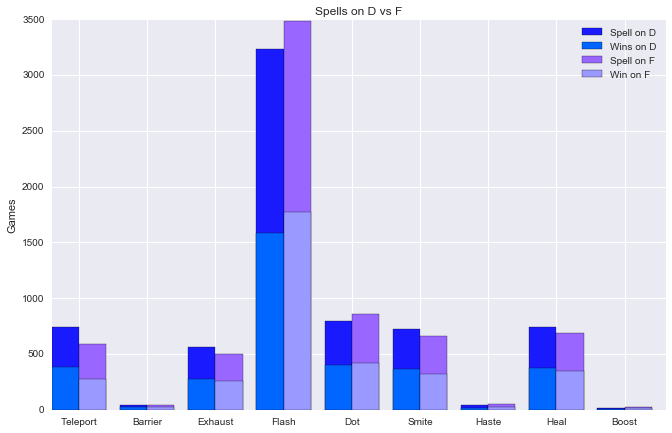

In [13]:
gfeatures, gx, gy = getData("gold.csv")
dkey, fkey = getSpellCount(gfeatures, gx, gy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Platinum

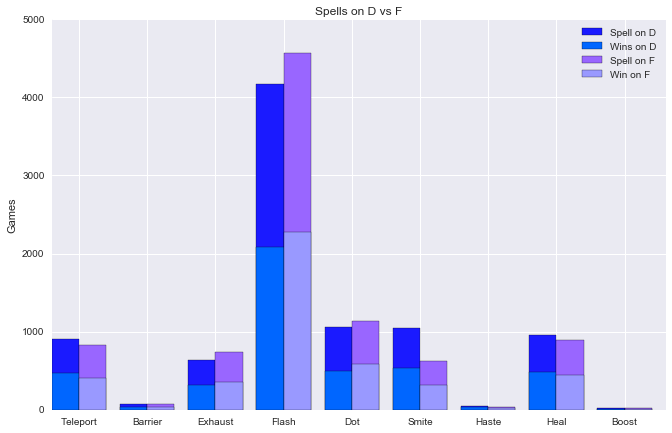

In [14]:
pfeatures, px, py = getData("platinum.csv")
dkey, fkey = getSpellCount(pfeatures, px, py, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Diamond

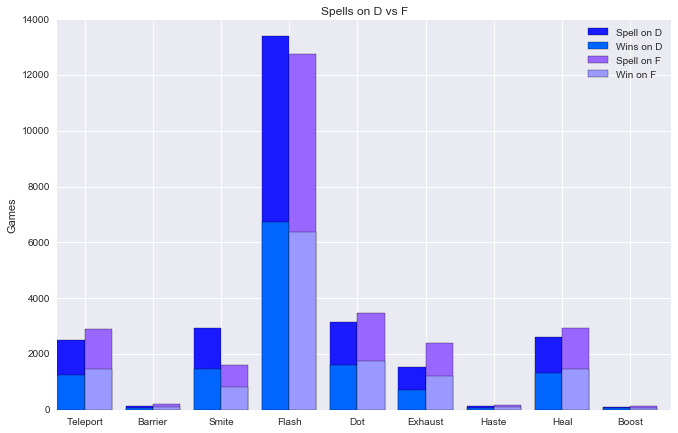

In [15]:
dfeatures, dx, dy = getData("diamond.csv")
dkey, fkey = getSpellCount(dfeatures, dx, dy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Master

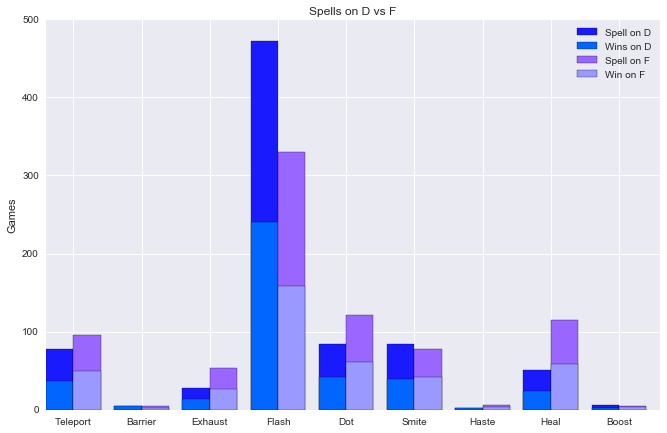

In [16]:
mfeatures, mx, my = getData("master.csv")
dkey, fkey = getSpellCount(mfeatures, mx, my, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Challenger

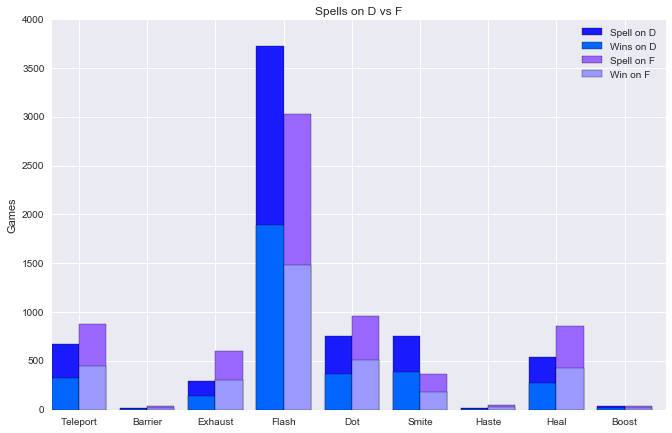

In [17]:
cfeatures, cx, cy = getData("challenger.csv")
dkey, fkey = getSpellCount(cfeatures, cx, cy, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

# Overall Totals

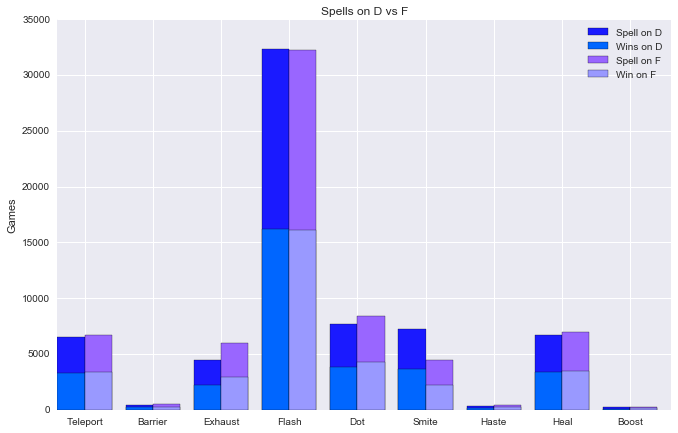

In [18]:
x = np.concatenate([bx, sx, gx, px, dx, mx, cx])
y = np.concatenate([by, sy, gy, py, dy, my, cy])
dkey, fkey = getSpellCount(bfeatures, x, y, spells)
dtotals, dwins, ftotals, fwins = getTotals(dkey, fkey)
plotData(dtotals, dwins, ftotals, fwins)

In [22]:
x[1][:1000]

array(['2341', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',
       '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0',

In [23]:
y[1]

array(['0', '1'], 
      dtype='|S1')